# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

**Develop a simple linear regression model that predicts car price based on engine size.**
Datasets to be used: *Car_features_train.csv, Car_prices_train.csv*

In [2]:
trainf = pd.read_csv('Car_features_train.csv')
trainp = pd.read_csv('Car_prices_train.csv')
train = pd.merge(trainf,trainp)
train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,18473,bmw,6 Series,2020,Semi-Auto,11,Diesel,145,53.3282,3.0,37980
1,15064,bmw,6 Series,2019,Semi-Auto,10813,Diesel,145,53.0430,3.0,33980
2,18268,bmw,6 Series,2020,Semi-Auto,6,Diesel,145,53.4379,3.0,36850
3,18480,bmw,6 Series,2017,Semi-Auto,18895,Diesel,145,51.5140,3.0,25998
4,18492,bmw,6 Series,2015,Automatic,62953,Diesel,160,51.4903,3.0,18990


In [3]:
#Using the ols function to create an ols object. 'ols' stands for 'Ordinary least squares'
ols_object = smf.ols(formula = 'price~engineSize', data = train)

In [4]:
#Using the fit() function of the 'ols' class to fit the model
model = ols_object.fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     3177.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:50:56   Log-Likelihood:                -53949.
No. Observations:                4960   AIC:                         1.079e+05
Df Residuals:                    4958   BIC:                         1.079e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4122.0357    522.260     -7.893      0.000   -5145.896   -3098.176
engineSize  1.299e+04    230.450     56.361      0.000    1.25e+04    1.34e+04
==============================================================================
Omnibus:                     1271.986   Durbin-Watson:                   0.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6490.719
Skew:                           1.137   Prob(JB):                         0.00
Kurtosis:                       8.122   Cond. No.                         7.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#Printing model summary which contains among other things, the model coefficients
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     3177.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:34:43   Log-Likelihood:                -53949.
No. Observations:                4960   AIC:                         1.079e+05
Df Residuals:                    4958   BIC:                         1.079e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4122.0357    522.260     -7.893      0.000   -5145.896   -3098.176
engineSize  1.299e+04    230.450     56.361      0.000    1.25e+04    1.34e+04
==============================================================================
Omnibus:                     1271.986   Durbin-Watson:                   0.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6490.719
Skew:                           1.137   Prob(JB):                         0.00
Kurtosis:                       8.122   Cond. No.                         7.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model equation is:
car price = -4122.0357 + 12990 * engineSize

**Visualize the regression line**

(-1.0, 7.0)

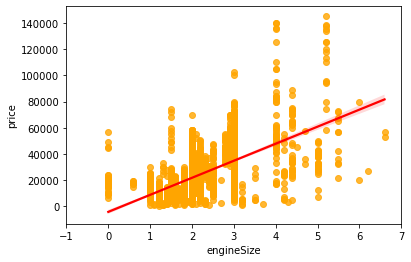

In [6]:
sns.regplot(x = 'engineSize', y = 'price', data = train, color = 'orange',line_kws={"color": "red"})
plt.xlim(-1,7)
#Note that some of the engineSize values are 0. They are incorrect, and should ideally be imputed before developing the model.

**Predict the car price for the cars in the test dataset**. Datasets to be used: *Car_features_test.csv, Car_prices_test.csv*

In [7]:
testf = pd.read_csv('Car_features_test.csv')
testp = pd.read_csv('Car_prices_test.csv')

In [8]:
#Using the predict() function associated with the 'model' object to make predictions of car price on test (unknown) data
pred_price = model.predict(testf)#Note that the predict() function finds the predictor 'engineSize' in the testf dataframe, and plugs it's values in the regression equation for prediction.

**Make a visualization that compares the predicted car prices with the actual car prices**

Text(0, 0.5, 'Predicted price')

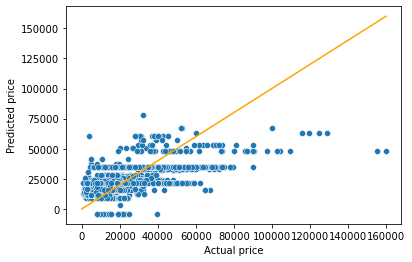

In [9]:
sns.scatterplot(x = testp.price, y = pred_price)
#In case of a perfect prediction, all the points must lie on the line x = y.
sns.lineplot(x = [0,testp.price.max()], y = [0,testp.price.max()],color='orange') #Plotting the line x = y.
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

The prediction doesn't look too good. This is because we are just using one predictor - engine size. We can probably improve the model by adding more predictors when we learn multiple linear regression.

**What is the RMSE of the predicted car price?**

In [10]:
np.sqrt(((testp.price - pred_price)**2).mean())

12995.1064515487

The root mean squared error in predicting car price is around $13k.

**What is the residual standard error based on the training data?**

In [11]:
np.sqrt(model.mse_resid)

12810.109175214136

The residual standard error on the training data is close to the RMSE on the test data. This shows that the performance of the model on unknown data is comparable to its performance on known data. This implies that the model is not overfitting, which is good! In case we overfit a model on the training data, it's performance on unknonwn data is likely to be worse than that on the training data.

**Find the confidence and prediction intervals of the predicted car price**

In [12]:
#Using the get_prediction() fucntion associated with the 'model' object to get the intervals
intervals = model.get_prediction(testf)

In [13]:
#The function requires specifying alpha (probability of Type 1 error) instead of the confidence level to get the intervals
intervals.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
1,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
2,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
3,8866.245277,316.580850,8245.606701,9486.883853,-16254.905974,33987.396528
4,47831.088340,468.949360,46911.740050,48750.436631,22700.782946,72961.393735
...,...,...,...,...,...,...
2667,47831.088340,468.949360,46911.740050,48750.436631,22700.782946,72961.393735
2668,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
2669,8866.245277,316.580850,8245.606701,9486.883853,-16254.905974,33987.396528
2670,21854.526298,184.135754,21493.538727,22215.513869,-3261.551421,46970.604017


**Show the regression line predicting car price based on engine size for test data. Also show the confidence and prediction intervals for the car price.**

In [14]:
interval_table = intervals.summary_frame(alpha=0.05)

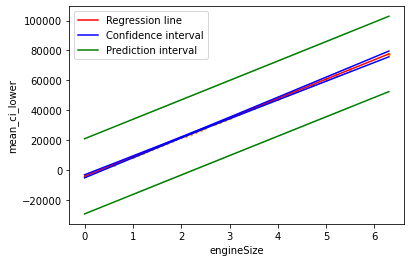

In [15]:
sns.scatterplot(x = testf.engineSize, y = pred_price,color = 'orange', s = 10)
sns.lineplot(x = testf.engineSize, y = pred_price, color = 'red')
sns.lineplot(x = testf.engineSize, y = interval_table.mean_ci_lower, color = 'blue')
sns.lineplot(x = testf.engineSize, y = interval_table.mean_ci_upper, color = 'blue',label='_nolegend_')
sns.lineplot(x = testf.engineSize, y = interval_table.obs_ci_lower, color = 'green')
sns.lineplot(x = testf.engineSize, y = interval_table.obs_ci_upper, color = 'green')
plt.legend(labels=["Regression line","Confidence interval", "Prediction interval"])